In [6]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import time as time
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/jonathanhilgart/anaconda/envs/SVB/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [722]:
t = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )

In [4]:
def ESP_Joint_Product_Probabilities(week_n,increase_mmb=0,increase_cmma=0,increase_cm=0,increase_fx=0,
                                    increase_loc=0, increase_es = 0,increase_checking=0):
    """Returns the conditions probabilities of the following ESP products.
    'Money Market Bonus',
    'Collateral MMA',
    'Cash Management',
    'FX Products',
    'Letters of Credit',
    'Enterprise Sweep',
    'Checking USD'
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function.
    
    The parameters increase_cmma - increase_checking corerspond to increaseing the probabilities of having these
    products by a certain percent."""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 

    mmb1_cmma1 = np.poly1d([ -3.97387788e-08 ,  8.39060495e-05 , -1.41648742e-03])
    mmb1_cmma0 = np.poly1d([  6.53083270e-09  ,-1.06768753e-05 ,  8.97296652e-03] )
    mmb0_cmma1 = np.poly1d([ -5.75924616e-09 ,  2.91090945e-06 ,  5.97039453e-03]  )
    mmb0_cmma0 = np.poly1d([ -9.17148387e-06  ,  1.28446720e-02]  )

    mmb1_cm1 = np.poly1d([ -3.99173667e-08 ,  8.52748866e-05 , -1.26911672e-03])
    mmb1_cm0 = np.poly1d([ -1.42073046e-09 , -3.01074706e-06 ,  7.24356190e-03])
    mmb0_cm1 = np.poly1d([ -4.32310836e-06 ,  6.61057651e-03] )
    mmb0_cm0 = np.poly1d([ -1.04364552e-05  , 1.13630152e-02]  )

    mmb1_fx1 = np.poly1d([  3.77558215e-08 , -1.70896360e-05 ,  1.41902186e-02] )
    mmb1_fx0 = np.poly1d([ -3.39320861e-09 ,  1.00679851e-07,   7.34716596e-03]  )
    mmb0_fx1 = np.poly1d([ -7.11607895e-09 ,  8.69248176e-06 ,  1.55942016e-03])
    mmb0_fx0 = np.poly1d([  3.56992186e-09 , -1.07772712e-05  , 1.36477158e-02])

    mmb1_loc1 = np.poly1d([  5.25454187e-08 ,  9.81576217e-04] )
    mmb1_loc0 = np.poly1d([ -1.52993041e-07  , 9.99214116e-04] )
    mmb0_loc1 = np.poly1d([ -3.56373660e-07  , 4.02453535e-04] )
    mmb0_loc0 = np.poly1d([  2.78458433e-09 , -5.55324556e-06  , 2.52137996e-03])
    
    mmb1_es1 = np.poly1d([ -8.11515816e-09 ,  1.30677967e-05 , -1.66164976e-03])
    mmb1_es0 = np.poly1d([ -2.83726125e-09  , 3.02318628e-06  , 7.70547714e-04])
    mmb0_es1 = np.poly1d([ -1.03463875e-07 ,  2.17269614e-04])
    mmb0_es0 = np.poly1d([ -1.72630448e-06  , 1.91353792e-03] )

    mmb1_checking1 = np.poly1d([  9.90340592e-11  ,-2.20755206e-07 ,  2.08171476e-04 ,  2.25396450e-02] )
    mmb1_checking0 = np.poly1d([ -6.22848774e-08 ,  6.20852344e-05])
    mmb0_checking1 = np.poly1d([  1.61567597e-08 , -5.48140827e-05 ,  5.02368463e-02] )
    mmb0_checking0 = np.poly1d([ -2.10425978e-06 ,  2.14375451e-03] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([ -1.07147840e-07 ,  2.62003505e-04 ,  7.77949524e-02] ) # done
    cmma1_cm0 = np.poly1d([  3.94757263e-08 , -8.44541127e-05 ,  4.60047128e-02]  )# done 
    cmma0_cm1 = np.poly1d([ -9.19873088e-10 , -1.38993772e-06  , 3.55769565e-03] )
    cmma0_cm0 = np.poly1d([  7.66885633e-08 , -1.83903621e-04  , 1.18526969e-01]  ) # done
    
    cmma1_fx1 = np.poly1d([ -4.11203208e-08  , 1.25165510e-04 ,  5.92837749e-03] )
    cmma1_fx0 = np.poly1d([  3.49627401e-09 , -2.55933675e-05,   3.06700660e-02])
    cmma0_fx1 = np.poly1d([  1.35117893e-08 , -1.18747924e-05 ,  1.29550469e-02])
    cmma0_fx0 = np.poly1d([  2.88145904e-08 , -6.70744145e-05  , 4.35294657e-02])

    
    cmma1_loc1 = np.poly1d([ -2.11396231e-09  , 1.63332685e-05  , 4.88690981e-03] )
    cmma1_loc0 = np.poly1d([  1.03395083e-09 , -3.02603195e-06 ,  2.09169313e-03] )
    cmma0_loc1 = np.poly1d([ 0.00010498 ,-0.02384952])
    cmma0_loc0 = np.poly1d([  3.89447845e-10  ,-9.42534361e-06 ,  1.17229878e-02] )
    
    cmma1_es1 = np.poly1d([ -1.45986565e-09  , 2.12493933e-06 ,  3.73789940e-03]  )
    cmma1_es0 = np.poly1d([  3.92800083e-12 , -1.04503251e-08 ,  5.45319813e-06  , 1.89477511e-03] )
    cmma0_es1 = np.poly1d([ -1.56676750e-09  , 2.07520362e-06,   1.30382436e-04] )
    cmma0_es0 = np.poly1d([ -1.03287399e-12  , 3.69559395e-09  ,-6.11002712e-06  , 3.96829922e-03] )
    
    cmma1_checking1 = np.poly1d([  7.93112441e-05 ,  1.61708520e-01]  )
    cmma1_checking0 = np.poly1d([  2.53481141e-05 ,  1.44230769e-02] )
    cmma0_checking1 = np.poly1d([  8.71213861e-08 , -1.96494017e-04 ,  1.33087417e-01]  )
    cmma0_checking0 = np.poly1d([  8.58582251e-09 , -2.12376410e-05,   1.44889333e-02] )
    # Cash Management  HERE
    cm1_fx1 = np.poly1d([  6.33125977e-05  , 1.90599649e-02]  )
    cm1_fx0 = np.poly1d([  9.11177591e-11 , -1.48383331e-05  , 2.08985055e-02]  )
    cm0_fx1 = np.poly1d([  7.24260624e-10,  -4.41520195e-06 ,  1.34512441e-02])
    cm0_fx0 = np.poly1d([  3.34690552e-08 , -8.19709941e-05  , 5.16518003e-02]   )
    
    cm1_loc1 = np.poly1d([  1.19793814e-08  ,-4.28289261e-06 ,  2.90739113e-03])
    cm1_loc0 = np.poly1d([  4.46840142e-10 , -1.47337813e-06 ,  1.10497669e-03])
    cm0_loc1 = np.poly1d([  3.74222984e-10 , -2.14616795e-06 ,  2.07542983e-03])
    cm0_loc0 = np.poly1d([  5.01831593e-09 , -1.05949007e-05 ,  5.24536410e-03])
    
    cm1_es1 = np.poly1d([ -9.87965875e-10 ,  1.00430187e-06  , 3.88336150e-03] )
    cm1_es0 = np.poly1d([ -2.32181212e-09 ,  1.44931612e-06  , 2.01929468e-03])
    cm0_es1 = np.poly1d([  1.10258527e-09 , -2.63413534e-06 ,  1.51801238e-03] )
    cm0_es0 = np.poly1d([ -2.42557725e-06  , 2.55554739e-03] )
    
    cm1_checking1 = np.poly1d([  1.16641954e-04  , 1.35553265e-01] )
    cm1_checking0 = np.poly1d([ -2.83461971e-08  , 2.88136671e-05] )
    cm0_checking1 = np.poly1d([ -9.72041225e-05 ,  1.21239440e-01])
    cm0_checking0 = np.poly1d([ -9.07981889e-06  , 1.22044805e-02] )
    # FX Product 
    fx1_loc1  = np.poly1d([  4.03018760e-08 , -3.23774136e-05 ,  6.69409722e-03]  )
    fx1_loc0 = np.poly1d([ -8.32916056e-10 , -4.01476298e-07 ,  1.80753249e-03]  )
    fx0_loc1 = np.poly1d( [ -8.79676701e-09  , 1.49704286e-05  ,-2.35403981e-04])
    fx0_loc0 = np.poly1d([  4.20273828e-09 , -1.17805576e-05 ,  8.16185994e-03])

    fx1_es1 = np.poly1d([ -8.79344719e-07 ,  3.11640690e-03] )
    fx1_es0 = np.poly1d([  6.70680662e-06 , -2.38916674e-03] )
    fx0_es1 = np.poly1d([ -1.39399064e-06 ,  2.63688800e-03] )
    fx0_es0 = np.poly1d([  1.65322255e-07  , 2.67717965e-03])

    fx1_checking1 = np.poly1d([ 0.00015544 , 0.11177389]  )
    fx1_checking0 = np.poly1d([ -5.76078153e-08 ,  5.73748319e-05])
    fx0_checking1 = np.poly1d([  8.65723071e-08  ,-2.47578484e-04  , 1.92836896e-01] )
    fx0_checking0 = np.poly1d([ -1.12875457e-05  , 1.35901392e-02]  )
    # Letters of Credit
    loc1_es1 = np.poly1d([  5.30097525e-07 , -7.69620529e-05] )
    loc1_es0 = np.poly1d([  1.08483248e-05 , -4.31603149e-03] )
    loc0_es1 = np.poly1d([  2.77403931e-07 ,  8.97384536e-05]  )
    loc0_es0 = np.poly1d( [ -1.86682330e-06  , 2.59526233e-03])

    loc1_checking1 = np.poly1d([  1.98720295e-08  ,-2.25224995e-06  , 8.08277786e-03]   )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([  8.23942003e-10 , -1.31357980e-05  , 1.55262399e-02] )
    loc0_checking0 = np.poly1d([  1.73617194e-09 , -3.13832001e-06 ,  1.19825383e-03] )
    # Enterprise sweep
    es1_checking1 = np.poly1d([ -1.95193364e-06  , 1.19513294e-02])
    es1_checking0 = np.poly1d([ -5.76078153e-08 ,  5.73748319e-05])
    es0_checking1 = np.poly1d([  2.35648445e-08 , -3.48007869e-05  , 1.76964238e-02]   )
    es0_checking0 = np.poly1d([  1.14997040e-09 , -2.08301674e-06  , 7.98522218e-04])
    

    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}
    #print(mmb1_cmma1 , 'mmb1_cmma1')
    #print(mmb1_cmma1(days),'mmb1_cmma1(days)')
    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days) 
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days) + increase_cmma
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days) 
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days) + increase_checking
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days) 
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days) + increase_cm
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days) 
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days) + increase_mmb

    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days) + increase_fx
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days) 
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days) + increase_loc
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days) + increase_es
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days) + increase_mmb
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days) + increase_checking
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days) + increase_cmma
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days) + increase_cm
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days) + increase_cmma
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days) + increase_fx
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days) + increase_cmma
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days) + increase_loc
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days) + increase_cmma
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days) + increase_es
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days) + increase_cmma
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days) + increase_checking
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days) + increase_cm
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)+ increase_fx
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days) + increase_cm
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days) + increase_loc
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days) + increase_cm
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days) + increase_es
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days) 
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)+ increase_cm
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days) + increase_checking
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days) + increase_fx
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days) + increase_loc
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)+ increase_fx
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days) + increase_es
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)+ increase_fx
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days) + increase_checking
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days) + increase_loc
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days) + increase_es
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days) + increase_loc
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days) + increase_es
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days) + increase_checking
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)


 
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    
                        
                        

    

In [198]:
ESP_Joint_Product_Probabilities(10)

{'cm0_checking0': 0.011568893177700001,
 'cm0_checking1': 0.11443515142500001,
 'cm0_es0': 0.0023857569825000004,
 'cm0_es1': 0.0013390255740229999,
 'cm0_fx0': 0.046077829083480001,
 'cm0_fx1': 0.0131457288405576,
 'cm0_loc0': 0.0045283107990570001,
 'cm0_loc1': 0.0019270317661215998,
 'cm1_checking0': 2.6829433303e-05,
 'cm1_checking1': 0.14371820178,
 'cm1_es0': 0.002109369929012,
 'cm1_es1': 0.0039488215981124996,
 'cm1_fx0': 0.019860268660019591,
 'cm1_fx1': 0.023491846739,
 'cm1_loc0': 0.0010040297375958,
 'cm1_loc1': 0.00266628761616,
 'cmma0_checking0': 0.013044368960298999,
 'cmma0_checking1': 0.11975973060189002,
 'cmma0_cm0': 0.10602948949016999,
 'cmma0_cm1': 0.0034558926314687999,
 'cmma0_es0': 0.0035583514561764299,
 'cmma0_es1': 0.00026796952865000003,
 'cmma0_fx0': 0.038975448177959997,
 'cmma0_fx1': 0.012190019199569999,
 'cmma0_loc0': 0.0110651220417405,
 'cmma0_loc1': -0.016500919999999999,
 'cmma1_checking0': 0.016197444887,
 'cmma1_checking1': 0.16726030708699999,


In [2]:


def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None,single=False):
    """Returns the probability of having a given ESP product during a certain month. 
    Parameters:
    
    esp_money_market_jointprob_probabilities: the dictionary of joint probabilities between each of the products
    week_n_one_time
    single , goes along with week_n_one_time . These parameters are used for calculating the probabilities of a given 
    product ONCE. If you want to infer for multiple weeks, leave these parameters along and you can change the 
    range_of_weeks parameters.
    
    The range_of_weeks parameter will run a loop for that number of weeks to perform probability inference over.
    
    This model works using BeliefPropogation to infer the probability of each product, given evidence from other 
    products.
    
    Returns the probabilities associated with each product.
    """
    
    #Record the probabilities of difference products
    prob_checking_original = []
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    # Define the factors (joint probabilities) for our markov model
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    
  
    def markov_inference(dict_of_esp_jointprob):
        """Calculate the markov model """
        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                    dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                    dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                    dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                    dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                    dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                    dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
        # collateral mma

        factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                            cardinality=[2, 2],
                        values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])

        factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                    dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
        factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                    dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
        factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                    dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
        factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                    dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
        # cash management
        factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                    dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
        factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                    dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
        factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                    dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
        factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                    dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  

        # FX products
        factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                    dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
        factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                    dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
        factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                    dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  

        # letters of credit

        factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                    dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
        factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                         cardinality=[2, 2],
                         values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
        #enterprise sweep

        factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                    dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  
    
        # built the markov model
        model.add_factors(factor_mmb_cmma , factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es, factor_mmb_checking,
                          factor_cmma_cm , factor_cmma_fx, factor_cmma_loc, factor_cmma_es,factor_cmma_checking,
             factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking , factor_fx_loc,
                  factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )
        

        belief_propagation = BeliefPropagation(model)

        
        all_products = ['money_market_bonus','collateral_mma', 'cash_management','enterprise_sweep',
                                    'fx_products','letters_of_credit','checking_usd']
        

        # perform inference for all product except the one in the for loop
        for prod in all_products:
            if evidence_==None:
                new_evidence=evidence_

            else:
                new_evidence = {key: value for key, value in evidence_.items() 
                 if key != prod}
            # perform belief inference on only one product at a time
            belief_inference_products = str(prod)


            # belief propogation on one product at a time given evidence from all other products
            belief = belief_propagation.query(variables=[belief_inference_products], evidence=new_evidence)

            try:
                #mmb = belief_mmb['money_market_bonus'].values[1]
                mmb = belief['money_market_bonus'].values[1]
                if mmb <0 :
                    mmb = .0000001
                elif mmb >1:
                    mmb =1
                prob_mmb.append(mmb)# one is having the product
            except: ## can't perform inference on this product
                pass
            try:
                #cmma = belief_cmma['collateral_mma'].values[1]
                cmma = belief['collateral_mma'].values[1]
                if cmma <0:
                    cmma = .0000001
                elif cmma >1:
                    cmma =1
                prob_cmma.append(cmma)
            except:## don't have this product
                pass
            try:
                #cm = belief_cm['cash_management'].values[1]
                cm = belief['cash_management'].values[1]
                if cm <0:
                    cm = .0000001
                elif cm >1:
                    cm =1
                prob_cm.append(cm)
            except:
                pass
            try:
                #checking = belief_checking['checking_usd'].values[1]
                checking = belief['checking_usd'].values[1]
                checking = belief['checking_usd'].values[1]
                if checking <0:
                    checking = .0000001
                elif checking >1:
                    checking =1
                prob_checking.append(checking)
            except:
                pass
            try:
                #fx = belief_fx['fx_products'].values[1]
               
                fx = belief['fx_products'].values[1]
                if fx <0:
                    fx = .0000001
                elif fx >1:
                    fx =1
                prob_fx.append(fx)
            except:
                pass
            try:
                #loc = belief_loc['letters_of_credit'].values[1]
                loc = belief['letters_of_credit'].values[1]
                if loc <0:
                    loc = .0000001
                elif loc > 1:
                    loc = 1
                prob_loc.append(loc)
            except:
                
                pass
            try:
                #es = belief_es['enterprise_sweep'].values[1]\
                es = belief['enterprise_sweep'].values[1]
                if es<0:
                    es = .0000001
                elif es >1:
                    es = 1
                prob_es.append(es)
            except:
                pass



    if single==False:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            markov_inference(dict_of_esp_jointprob)
    else:
        dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_one_time)
        markov_inference(dict_of_esp_jointprob)
        # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
        #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
        
    print(prob_checking,'checking', prob_cmma,'cmma', prob_mmb,'mmb', prob_cm,'cm', prob_fx,'fx', prob_loc,'loc',
          prob_es,'es')
    #return prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es, prob_checking_original
    return prob_checking[0], prob_cmma[0], prob_mmb[0], prob_cm[0], prob_fx[0], prob_loc[0], prob_es[0]

    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))

        


In [195]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,evidence_={'money_market_bonus':1,
                                                                                                 'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) 

[0.99999999999987244] checking [0.88438933530806041] cmma [1] mmb [1e-07] cm [1] fx [1] loc [0.10386088206768589] es


In [876]:
checking, cmma, mmb , cm, fx, loc, es = ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,
                                                                    week_n_one_time=1,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) 

[0.99923176046362727] checking [0.096166520272165004] cmma [1e-07] mmb [0.0240042787866033] cm [0.33437927272743223] fx [0.91668096236822894] loc [0.61803996529202598] es [] checking original


In [9]:
ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=1,
                                            evidence_={'letters_of_credit':1,'checking_usd':1}) 

[0.99999909956712285] checking [1e-07] cmma [0.31902323022093942] mmb [1e-07] cm [0.38560760667405192] fx [1e-07] loc [0.00012909299737458177] es


(0.99999909956712285,
 1e-07,
 0.31902323022093942,
 1e-07,
 0.38560760667405192,
 1e-07,
 0.00012909299737458177)

In [ ]:
## new probs - combo


probs_combo = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                          evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':1,'letters_of_credit':0,'checking_usd':1}) for i in range(152)]




In [15]:
## new probs - combo


probs_combo = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                          evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':1,'letters_of_credit':0,'checking_usd':1}) for i in range(152)]




[0.99999999916402638] checking [0.0084737385722129088] cmma [0.22488927136412912] mmb [0.0045837511399203024] cm [1e-07] fx [0.29176451576900653] loc [1e-07] es
[0.99999999919080851] checking [0.010229136920829168] cmma [0.23756542269745859] mmb [0.0048821722208994469] cm [1e-07] fx [0.28141762932681075] loc [1e-07] es
[0.99999999921695548] checking [0.012123597536004222] cmma [0.25010775400532526] mmb [0.0051972866639016617] cm [1e-07] fx [0.27102634700319356] loc [1e-07] es
[0.99999999924248295] checking [0.01416130795556958] cmma [0.26253872579454385] mmb [0.0055299781143461459] cm [1e-07] fx [0.2605974959240247] loc [1e-07] es
[0.99999999926740546] checking [0.016346312312912014] cmma [0.27487779353503067] mmb [0.0058811777560785856] cm [1e-07] fx [0.25013856670212364] loc [1e-07] es
[0.99999999929173689] checking [0.018682490109820756] cmma [0.28714189678202945] mmb [0.006251866989003577] cm [1e-07] fx [0.23965776029061184] loc [1e-07] es
[0.99999999931549088] checking [0.02117353

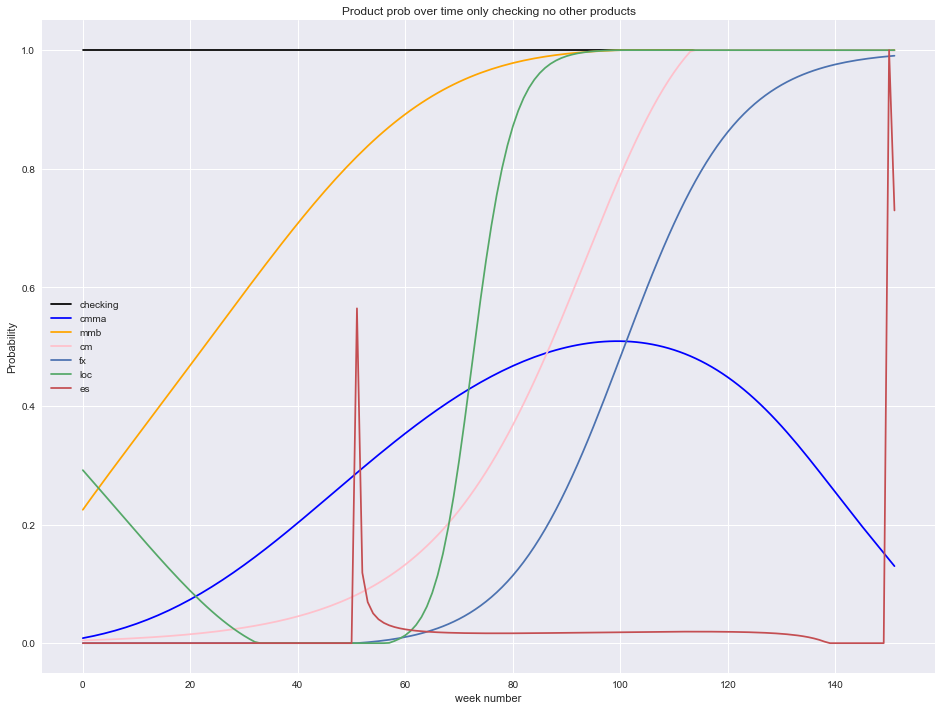

In [19]:
## FINAL - new probs - combo
plt.figure(figsize=(16,12))
plt.plot([probs_combo[i][0] for i in range(len(probs_combo))],label='checking',color='black')
plt.plot([probs_combo[i][1] for i in range(len(probs_combo))],label='cmma',color='blue')
plt.plot([probs_combo[i][2] for i in range(len(probs_combo))],label='mmb',color='orange')
plt.plot([probs_combo[i][3] for i in range(len(probs_combo))],label='cm',color='pink')
plt.plot([probs_combo[i][4] for i in range(len(probs_combo))],label='fx')
plt.plot([probs_combo[i][5] for i in range(len(probs_combo))],label='loc')
plt.plot([probs_combo[i][6] for i in range(len(probs_combo))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time only checking no other products')
plt.xlabel('week number')
plt.ylabel('Probability')

In [75]:
## new probs
probs_allzero = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                            evidence_={'money_market_bonus':0,'collateral_mma':0,
                                                       'cash_management':0,'enterprise_sweep':0,
                                    'fx_products':0,'letters_of_credit':0,'checking_usd':0}) for i in range(104)]

[0.99999988522554839] checking [0.010665327198786862] cmma [0.0011067424798894404] mmb [2.7765046094405449e-06] cm [1e-07] fx [1e-07] loc [5.4226494150548994e-06] es [] checking original
[0.99999988666783624] checking [0.011315121915700719] cmma [0.0011672885020196139] mmb [2.8637037312980221e-06] cm [1e-07] fx [1e-07] loc [6.281284443182688e-06] es [] checking original
[0.99999988812834939] checking [0.011991281781052427] cmma [0.001230064068474167] mmb [2.9537200420241111e-06] cm [1e-07] fx [1e-07] loc [7.1945800779564172e-06] es [] checking original
[0.99999988960702324] checking [0.01269448977755583] cmma [0.0012951606077880333] mmb [3.0466599624872602e-06] cm [1e-07] fx [0.01438555761225942] loc [8.1649117474125066e-06] es [] checking original
[0.99999989110377674] checking [0.013425434990282169] cmma [0.0013626741497237754] mmb [3.142634669540136e-06] cm [1e-07] fx [0.033252650597992352] loc [9.194779684387405e-06] es [] checking original
[0.99999989261851097] checking [0.0141848

In [12]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs_allzero[i][0] for i in range(len(probs_allzero))],label='checking',color='black')
plt.plot([probs_allzero[i][1] for i in range(len(probs_allzero))],label='cmma',color='red')
plt.plot([probs_allzero[i][2] for i in range(len(probs_allzero))],label='mmb')
plt.plot([probs_allzero[i][3] for i in range(len(probs_allzero))],label='cm')
plt.plot([probs_allzero[i][4] for i in range(len(probs_allzero))],label='fx')
plt.plot([probs_allzero[i][5] for i in range(len(probs_allzero))],label='loc')
plt.plot([probs_allzero[i][6] for i in range(len(probs_allzero))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time assuming having no products')
plt.xlabel('week number')
plt.ylabel('Probability')

NameError: name 'probs_allzero' is not defined

In [77]:
## new probs all evidence = 1
probs_allone = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i,
                                            evidence_={'money_market_bonus':1,'collateral_mma':1,
                                                       'cash_management':1,'enterprise_sweep':1,
                                    'fx_products':1,'letters_of_credit':1,'checking_usd':1}) for i in range(104)]

[0.99999999999985933] checking [0.91853338363793946] cmma [1] mmb [1] cm [1] fx [1] loc [0.11387849724148369] es [] checking original
[0.99999999999987244] checking [0.88438933530806041] cmma [1] mmb [1e-07] cm [1] fx [1] loc [0.10386088206768589] es [] checking original
[0.99999999999988376] checking [0.72523169432097989] cmma [1e-07] mmb [1e-07] cm [1] fx [1] loc [0.09440562290608881] es [] checking original
[0.99999999999989375] checking [1] cmma [1e-07] mmb [0.46401746945652178] cm [0.96868883552094065] fx [1] loc [0.085469492248018114] es [] checking original
[0.99999999999990263] checking [1] cmma [1] mmb [0.67035675356258351] cm [0.93587657412194769] fx [1] loc [0.077015283914720706] es [] checking original
[0.99999999999991052] checking [1] cmma [1] mmb [0.77235253367493772] cm [0.91092288905762797] fx [1] loc [0.06901154929826242] es [] checking original
[0.9999999999999174] checking [1] cmma [1] mmb [0.83237363483395832] cm [0.89137358914475573] fx [1] loc [0.0614324188142788

In [11]:
## FINAL
plt.figure(figsize=(12,8))
plt.plot([probs_allone[i][0] for i in range(len(probs_allone))],label='checking',color='black')
plt.plot([probs_allone[i][1] for i in range(len(probs_allone))],label='cmma',color='red')
plt.plot([probs_allone[i][2] for i in range(len(probs_allzero))],label='mmb')
plt.plot([probs_allone[i][3] for i in range(len(probs_allone))],label='cm')
plt.plot([probs_allone[i][4] for i in range(len(probs_allone))],label='fx')
plt.plot([probs_allone[i][5] for i in range(len(probs_allone))],label='loc')
plt.plot([probs_allone[i][6] for i in range(len(probs_allone))],label='es')
#plt.plot([probs[i][7] for i in range(len(probs))],label='ORIGINAL CHECKING')
plt.legend()
plt.title('Product prob over time assuming a client has ALL products')
plt.xlabel('week number')
plt.ylabel('Probability')

NameError: name 'probs_allone' is not defined

## CLient Lifetime - units are months

In [92]:
exponential_lifetime_parameters = (2.9999999999982676, 11.500665661185888)

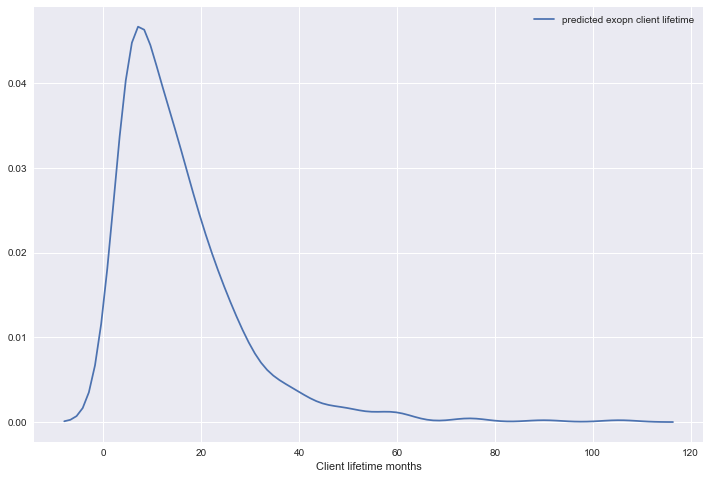

In [93]:
plt.figure(figsize=(12,8))
sns.kdeplot(stats.expon(*exponential_lifetime_parameters ).rvs(500), label='predicted exopn client lifetime')
plt.xlabel('Client lifetime months')

In [74]:
round(stats.expon(*exponential_lifetime_parameters ).rvs())

5.0

# Time how long this will take
-  to run the simlation model

In [248]:
time = np.array([0,1,2,3,4,5,6,9,14])
seconds = np.array([ 7.3,24,56,114 , 179, 264,294,620, 1357])

In [201]:
time_projection_linear = np.polyfit(time,seconds,1)
print(time_projection_linear)

[  95.51656977 -143.04767442]


In [202]:
time_projection_poly = np.polyfit(time,seconds,2)
print(time_projection_poly)

[  5.5267672   19.06563452   4.72908346]


In [203]:
time_projection_y_linear = np.poly1d(time_projection_linear)

In [204]:
time_projection_y_poly = np.poly1d(time_projection_poly)

In [205]:
print(time_projection_y)

 
52.25 x - 22.72


In [206]:
time_projection_y(2)

81.789285714285768

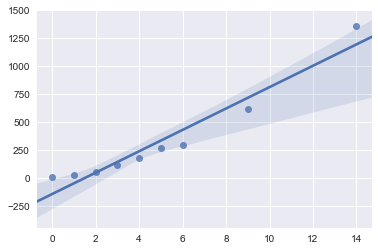

In [207]:
sns.regplot(time,seconds)

In [10]:
plt.figure(figsize=(12,8))
plt.plot(np.array([time_projection_y_linear(i) for i in range(17)]),label = 'projected linear')
plt.plot(np.array([time_projection_y_poly(i) for i in range(17)]),label = 'projected poly')
plt.scatter(time,seconds,label='original')
plt.xlabel('week number')
plt.ylabel('Seconds')
plt.legend()

NameError: name 'time_projection_y_linear' is not defined

In [211]:
# linear time
print('Running two years will take {} minutes in linear '.format(time_projection_y_linear(104)/60))

Running two years will take 163.17792635658915 minutes in linear 


In [215]:
# poly
print('Running two years will take {} minutes poly or {} hours'.format(time_projection_y_poly(104)/60,
                                                                       time_projection_y_poly(104)/60/60))

Running two years will take 1029.4178185730348 minutes poly or 17.156963642883913 hours


In [218]:
time_projection_y_poly(52)/60/60

4.4279223857875687

In [242]:
time_projection_y_poly(34)/60/60

1.9560843169590609

In [243]:
4.42 - 1.95

2.4699999999999998

In [241]:
# time projection on aws

In [264]:
time_ec2 = np.array([0,1,2,3,4,5,6,7,11])
seconds_ec2 = np.array([ 6.14,17,50,65 , 112, 160,  244, 261, 601])

In [265]:
time_projection_poly_ec2 = np.polyfit(time_ec2,seconds_ec2,2)
print(time_projection_poly_ec2)

[  3.75664037  12.99484648   3.20642786]


In [266]:
time_projection_y_poly_ec2 = np.poly1d(time_projection_poly_ec2)

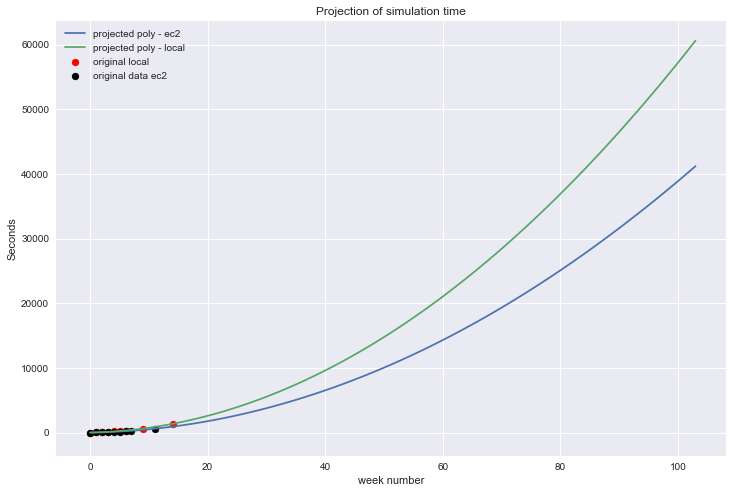

In [272]:
plt.figure(figsize=(12,8))
plt.plot(np.array([time_projection_y_poly_ec2(i) for i in range(104)]),label = 'projected poly - ec2')
plt.plot(np.array([time_projection_y_poly(i) for i in range(104)]),label = 'projected poly - local')
plt.scatter(time,seconds,label='original local', color = 'red')
plt.scatter(time_ec2,seconds_ec2 , label = 'original data ec2', color = 'black')
plt.xlabel('week number')
plt.ylabel('Seconds')
plt.legend()
plt.title('Projection of simulation time')

In [270]:
time_projection_y_poly_ec2(104)/60/60

11.662914638711204

In [284]:
print('EC2 will save {:%} percent time or {} hours'.format((17.15-11.66)/17.16, 17.15 - 11.66))

EC2 will save 31.993007% percent time or 5.489999999999998 hours


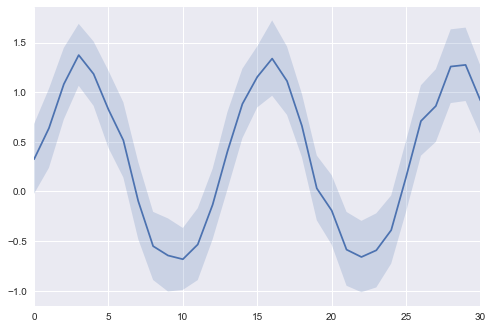

In [182]:
 import numpy as np; np.random.seed(22)
>>> import seaborn as sns; sns.set(color_codes=True)
>>> x = np.linspace(0, 15, 31)
>>> data = np.sin(x) + np.random.rand(10, 31) + np.random.randn(10, 1)
>>> ax = sns.tsplot(data=data)

In [184]:
data[0]

array([ 0.6726167 ,  1.42526277,  1.72616519,  2.32083315,  1.54461515,
        1.40149227,  0.87580901,  0.80441429, -0.07224181,  0.29857697,
       -0.48424123,  0.31981954,  0.99846686,  1.42437645,  1.31025412,
        1.40829701,  2.22555828,  2.22047545,  1.57821254,  0.68658331,
        0.6881278 ,  0.27267873, -0.14865056,  0.20390982,  0.35513849,
        0.98212391,  1.58695872,  1.37983576,  2.37803345,  2.3879375 ,
        1.79185478])

In [185]:
np.sin(x)

array([ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
        0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
       -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ,
        0.93799998,  0.98935825,  0.79848711,  0.41211849, -0.07515112,
       -0.54402111, -0.87969576, -0.99999021, -0.87545217, -0.53657292,
       -0.0663219 ,  0.42016704,  0.80378443,  0.99060736,  0.93489506,
        0.65028784])

In [186]:
data

array([[ 0.6726167 ,  1.42526277,  1.72616519,  2.32083315,  1.54461515,
         1.40149227,  0.87580901,  0.80441429, -0.07224181,  0.29857697,
        -0.48424123,  0.31981954,  0.99846686,  1.42437645,  1.31025412,
         1.40829701,  2.22555828,  2.22047545,  1.57821254,  0.68658331,
         0.6881278 ,  0.27267873, -0.14865056,  0.20390982,  0.35513849,
         0.98212391,  1.58695872,  1.37983576,  2.37803345,  2.3879375 ,
         1.79185478],
       [-0.43621914, -0.72288203, -0.21215386,  0.64103881,  0.42284559,
        -0.12482161, -0.96193001, -1.09788291, -1.47241293, -1.89764937,
        -2.14464665, -1.49924358, -1.41491481, -0.97105382,  0.1104314 ,
         0.5558068 , -0.11681849, -0.3038328 , -0.34620543, -1.10897653,
        -0.99378228, -1.50366581, -1.78787403, -1.12480698, -1.05900142,
        -1.0789754 , -0.64372858,  0.11116598,  0.07264423,  0.61504814,
        -0.4948404 ],
       [-1.15693699, -0.77244812,  0.10712619,  0.35502433,  0.18285087,
       